In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurazione grafici
sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv("bike_sharing.csv")

# Parsing data
df['data_completa'] = pd.to_datetime(df['data_completa'])

df.head()

,data_completa,mese,giorno_settimana,is_weekend,total_rentals,avg_duration
0,2022-08-26,8,5,False,3,15.333333
1,2022-08-27,8,6,True,3,25.333333
2,2022-08-28,8,7,True,3,28.333333
3,2022-08-29,8,1,False,7,53.428571
4,2022-08-30,8,2,False,3,19.333333


In [3]:
#Ordinamento temporale 
df = df.sort_values("data_completa").reset_index(drop=True)

In [4]:
#Feature:Vlaore del giorno precedente 
df['lag_1']=df['total_rentals'].shift(1)

In [5]:
#Feature : media mobile ultimi 7 giorni 
df['rolling_7'] = df['total_rentals'].rolling(window=7).mean()

In [6]:
#Rimuovo le righe iniziali con  valori mancanti 
df = df.dropna().reset_index(drop=True)

In [7]:
#Trasformazione clinica del mese 
df['mese_sin'] = np.sin(2 * np.pi * df['mese'] / 12)
df['mese_cos'] = np.cos(2 * np.pi * df['mese'] / 12)

In [10]:
features = [
    'mese',
    'giorno_settimana',
    'is_weekend',
    'lag_1',
    'rolling_7',
    'mese_sin',
    'mese_cos'
]

X = df[features]
y = df['total_rentals']

print(f"Shape di X: {X.shape}")
print(f"Shape di y: {y.shape}")


Shape di X: (188, 7)
Shape di y: (188,)


In [11]:
#split temporale  non random 
split_idx = int(len(df) * 0.8)

X_train = X.iloc[:split_idx]
X_test  = X.iloc[split_idx:]

y_train = y.iloc[:split_idx]
y_test  = y.iloc[split_idx:]

In [12]:
# 1. Importiamo la classe che utilizzeremo
from sklearn.linear_model import LinearRegression

# 1. Istanziazione
model = LinearRegression()

# 2. Fitting (Apprendimento)
model.fit(X_train, y_train)

# Vediamo cosa ha imparato (i coefficienti)
print("Intercetta:", model.intercept_)
print("Coefficienti:", dict(zip(features, model.coef_)))

Intercetta: 0.3404316439861388
Coefficienti: {'mese': np.float64(-0.086760085479322), 'giorno_settimana': np.float64(-0.17465326796066927), 'is_weekend': np.float64(0.15991285553848342), 'lag_1': np.float64(-0.09101511393073414), 'rolling_7': np.float64(1.2711611346039247), 'mese_sin': np.float64(0.09218523848758031), 'mese_cos': np.float64(0.4215338352860945)}


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse


(2.896215572038966, np.float64(3.45325537920821))

In [14]:
df['total_rentals'].describe()

count    188.000000
mean       5.175532
std        3.355264
min        1.000000
25%        2.000000
50%        5.000000
75%        7.000000
max       15.000000
Name: total_rentals, dtype: float64

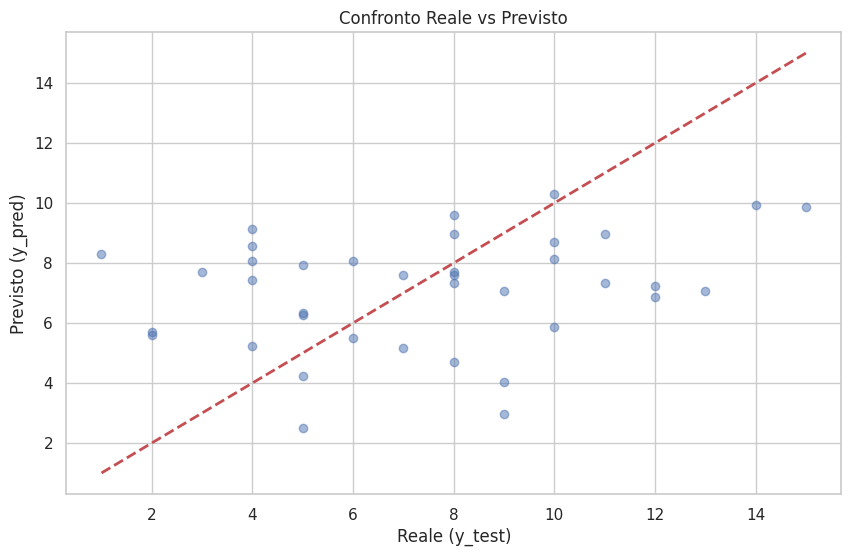

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Linea ideale
plt.xlabel('Reale (y_test)')
plt.ylabel('Previsto (y_pred)')
plt.title('Confronto Reale vs Previsto')
plt.show()